#    Moteur de recommandations de films - I

## Sommaire : 
 
### -1-Néttoyage dataset:

      - Taux de remplissageapres du dataset
      - Etudes de corrélation :
             - Représentation graphipe de la matrice : (suprimer les variables non correlées avec les autres)
         
      - Taux de remplissageapres du dataset sans doublons et apres le premier néttoyage 
      - Traitement des valeurs manquantes : 
                - variables quantitatives:
                        -methodes(remplacement par la moyenne , remplacement par 0)
                - variables catégorielles:
                        -methodes(remplacement par une string vide)

### -2-Analyse exploratoire : 

      -Analyse univariée:
          -la repartition du IMDB SCORE par rapport aux films
          -Movie facebook like
          
          
      -Analyse bivariée : 
          -Note IMDB par genre de film 
         

### -3- Préparation des données   

       -Variables quantitatives :
           -isoler les données numériques, demandent pas plus de traitement.
       -variables catégorielles  :
           -binariser les données categoriales :
                - Director name
                - Actor's(regrouper les trois types d'acteurs en une seule variables )
                - Genre
                - Content rating
                - Country
                
###  -4-   SCORE DE SIMILARITÉ 

  #### -4-1-PREMIERE RESULTAT : UNE PREMIERE FONCTION DE RECOMMANDATION BASÉE SUR SCORE DE SIMILARITÉ , COSINE( mots clefs et popularité : IMDB)
      
      -calculerez des vecteurs de fréquence de document à fréquence inverse (TF-IDF) pour chaque mot
      -Calcule de similarité baser sur COSINE appliquer sur les ( KEY WORDS ):quand on demande une recommandation de film, l'algorithme donne les 10 films les plus proches .
      
#### - 4 - 1  - COSINE D'ANGLE ENTRE DEUX VECTEURS (PLUSIEURS DIMENSIONS)(entre tout les variables qu'on a preparé et binaraisé et standarisé   

#### - 4 - 2  - DISTANCE DE MANHATTAN

#### - 4 - 3  - DISTANCE EUCLIDIEAN

#### - 4 - 4  - DISTANCE CHEBYSHEV

#### - 4 - 5  - DISTANCE MINKOWSKI

###  - 5  - COMPARAISON DE DISTANCE

         -distance retenu
### - 6 - KNN RECOMMANDATION
### - 7 - K-MEANS

         



####  - 6  CLUSTERING HIERACHIQUE(CHA)

          -dendogramm
          
          -dendogramm
          -conclusion
          
### API FLASK

In [89]:
import pandas as pd
import numpy as np

# importer DATASET
data_set = pd.read_csv('movie_metadata.csv')
df = data_set

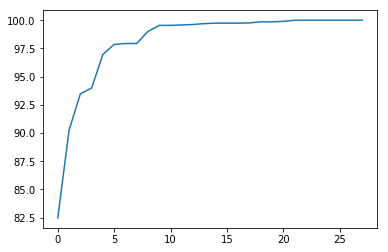

In [90]:

p_remplissage=df.isnull().sum()
p_remplissage
taux_remplissage=((5043-p_remplissage)/5043)*100
taux_rempli=pd.DataFrame(taux_remplissage)
Taux_remplissage=taux_rempli.sort_values(by = 0)

import matplotlib.pyplot as plt
x = np.array(range(len(Taux_remplissage)))
y = np.array(Taux_remplissage[0])
plt.plot(x, y)

plt.show() # affiche la figure a l'ecran


# taux remplissage total

In [91]:

taux_remplissage_total=(sum(Taux_remplissage[0])/len(Taux_remplissage))
taux_remplissage_total

98.08928925526187

# suprimer les doublons

In [92]:

data = df.drop_duplicates(subset='movie_title', keep='last')
data.index=range(len(data))

# Taux de remplissageapres apres la supression des doublons

In [93]:
# Taux de remplissageapres la supression des doublons
p_remplissage2=data.isnull().sum()

taux_remplissage2=((len(data)-p_remplissage2)/len(data))*100
taux_rempli2=pd.DataFrame(taux_remplissage2)
Taux_remplissage2=taux_rempli2.sort_values(by = 0)
taux_remplissage_total2=(sum(Taux_remplissage2[0])/len(Taux_remplissage2))
taux_remplissage_total2


98.07228565617827

# Traitement des valeurs manquantes : Variables Catégorielles : 
## Concernant les variables catégorielles je choisi de de remplacer  les valeurs manquantes par des champs vides. 
## Ca sera difficile d'imputer leur valeurs et avoir un resultat fiable par exemple pour le nom de realisateur pour pouvoir trouver son nom on doit faire un scraping qui est compliqué, en effet les valeurs vont etr

In [94]:
# Traitement des valeurs manquantes : Variables Catégorielles : 
# concernant les variables catégorielles je choisi de de remplacer  les valeurs manquantes par des champs vides. 
# Ca sera difficile d'imputer leur valeurs et avoir un resultat fiable par exemple pour le nom de realisateur pour pouvoir trouver son nom on doit faire un scraping qui est compliqué, en effet les valeurs vont etre traiter comme des valeurs muettes 
data[['actor_3_name']] = data[['actor_3_name']].fillna('')
data[['plot_keywords']] = data[['plot_keywords']].fillna('')
data[['movie_imdb_link']] = data[['movie_imdb_link']].fillna('')
data[['language']] = data[['language']].fillna('')
data[['country']] = data[['country']].fillna('')
data[['content_rating']] = data[['content_rating']].fillna('')

data[['color']] = data[['color']].fillna('')
data[['director_name']] = data[['director_name']].fillna('')
data[['actor_2_name']] = data[['actor_2_name']].fillna('')
data[['genres']] = data[['genres']].fillna('')
data[['actor_1_name']] = data[['actor_1_name']].fillna('')


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


# Traitement des missing values valeurs numeriques
#### num_critic_for_reviews
#### director_facebook_likes
#### actor_3_facebook_likes
#### actor_1_facebook_likes
#### num_voted_users
#### cast_total_facebook_likes
#### face_number_in_poster
#### num_user_for_reviews
#### actor_2_facebook_likes
#### movie_facebook_likes
#### duration
#### gross
####  budget
####  title_year
####  aspect_ratio
#### on met pour les missing values de :  num_critic_for_reviews, director_facebook_likes, actor_3_facebook_likes
#### actor_1_facebook_likes, number_voted_users, cast_total_facebook_likes, 
#### num_user_for_reviews, actor_2_facebook_likes, movie_facebook_likes

In [95]:

data[['num_critic_for_reviews']] = data[['num_critic_for_reviews']].fillna(0)
data[['director_facebook_likes']] = data[['director_facebook_likes']].fillna(0)
data[['actor_3_facebook_likes']] = data[['actor_3_facebook_likes']].fillna(0)
data[['actor_1_facebook_likes']] = data[['actor_1_facebook_likes']].fillna(0)
data[['num_voted_users']] = data[['num_voted_users']].fillna(0)
data[['num_user_for_reviews']] = data[['num_user_for_reviews']].fillna(0)
data[['actor_2_facebook_likes']] = data[['actor_2_facebook_likes']].fillna(0)
data[['movie_facebook_likes']] = data[['movie_facebook_likes']].fillna(0)


## changement de  missing values par  mean pour :  duration, title_year

In [96]:
#changement de  missing values par  mean pour :  duration, title_year
data[['duration']] = data[['duration']].fillna(data[['duration']].mean())
data[['title_year']] = data[['title_year']].fillna(data[['title_year']].mean())


## -Il nous reste les missing valuess des variables numeriques suivantes 
## -Avant on va representer graphiquement la matrice des Coefficients de corrélations entre les différentes variables quantitatives du dataframe.

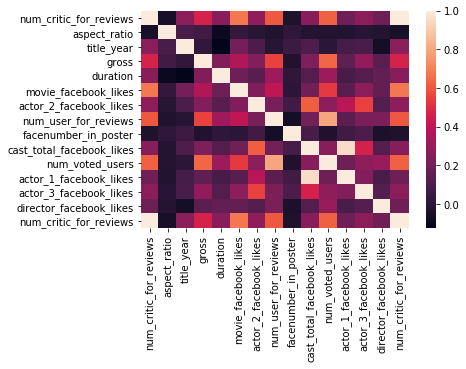

In [97]:
#Il nous reste les missing valuess des variables numeriques suivantes 
# avant on va representer graphiquement la matrice des Coefficients de corrélations entre les différentes variables quantitatives du dataframe.
Data_numerique=data[['num_critic_for_reviews','aspect_ratio','title_year','gross','duration','movie_facebook_likes','actor_2_facebook_likes','num_user_for_reviews','facenumber_in_poster','cast_total_facebook_likes','num_voted_users','actor_1_facebook_likes','actor_3_facebook_likes','director_facebook_likes','num_critic_for_reviews']]
import seaborn as sns
corr = Data_numerique.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## 1. ’cast_total_facebook_likes’ ≡ ’actor_1_facebook_likes’ (α = 0.95)
## 2. ’budget’, ’facenumber_in_poster’, ’aspect_ratio’ sont décorrélées de l’ensembles des autres variables (α < 0.2 ∀ couple)
## 1/ Par consistance avec les autres variables présentes dans le dataframe : 
## je Décide de supprimer la variable ’cast_total_facebook_likes’.
## 2/ Représentent respectivement le budget du film, le nombre de personnes sur l’affiche du film et le format de l’image.
## Ces deux dernières variables présentent peu d’intérêt pour le moteur de recherche et sont suprimées. 
## Dans le cas de la variable ’budget’, il est intéressant de remarquer qu’elle semble décorrélée de la variable ’gross’ qui donne les recettes générées par le film. La raison est que la variable ’budget’ contient des budgets mélangeant des devises étrangères, ce qui rend son compte peu significatif4. Cette variable est donc supprimée 5

In [98]:

data.drop(["gross","budget","cast_total_facebook_likes","facenumber_in_poster","aspect_ratio"],axis=1,inplace=True)


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [99]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'genres', 'actor_1_name', 'movie_title',
       'num_voted_users', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes'],
      dtype='object')

In [107]:
data.to_csv('data.csv')

# ANALYSE EXPLORATOIRE 


## Premierement on va etudier la repartition du score donnée par les itulisateurs aux films 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a38795978>]],
      dtype=object)

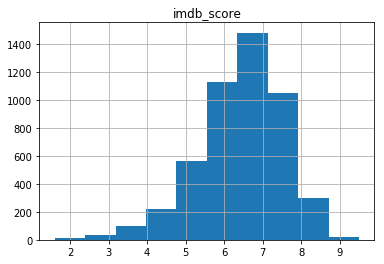

In [100]:

#Premierement on va etudier la repartition du score donnée par les itulisateurs aux films 
%matplotlib inline
data[['imdb_score']].hist(bins= 10)
#Remarque la repartition tourne vers 6 et 7 (note), elle est positive du coup on peut constater que les film sont bien noté 

## Remarque : la repartition tourne vers 6 et 7 (note), elle est positive du coup on peut constater que les film sont bien noté 

## Note imdb par genre de film 

[Text(0, 0, 'Action'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'Biography'),
 Text(0, 0, 'Comedy'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Documentary'),
 Text(0, 0, 'Drama'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'Fantasy'),
 Text(0, 0, 'Film-Noir'),
 Text(0, 0, 'Game-Show'),
 Text(0, 0, 'History'),
 Text(0, 0, 'Horror'),
 Text(0, 0, 'Music'),
 Text(0, 0, 'Musical'),
 Text(0, 0, 'Mystery'),
 Text(0, 0, 'News'),
 Text(0, 0, 'Reality-TV'),
 Text(0, 0, 'Romance'),
 Text(0, 0, 'Sci-Fi'),
 Text(0, 0, 'Short'),
 Text(0, 0, 'Sport'),
 Text(0, 0, 'Thriller'),
 Text(0, 0, 'War'),
 Text(0, 0, 'Western')]

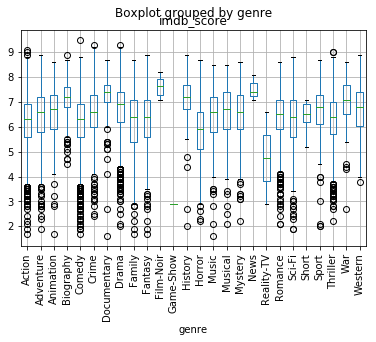

In [101]:
#Note imdb par genre de film 

import matplotlib.pyplot as plt
genres_ = data.set_index(data.index).genres.str.split(r'|', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre'); 
genresIMDB = pd.concat([genres_, data[['imdb_score']]], axis=1)
genresIMDB.boxplot(column='imdb_score', by='genre')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

# il n'y'a pas de surprise, la plus part des notes sont proche de la moyenne, comedie meilleurse note télé realité mauvaise note

## Remarque : il n'y'a pas de surprise, la plus part des notes sont proche de la moyenne, comedie meilleurse note télé realité mauvaise note

## Movie facebook like

[]

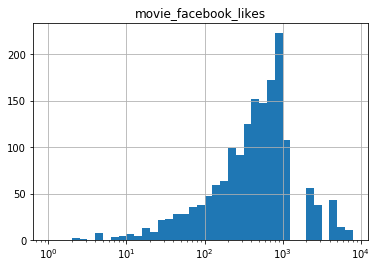

In [102]:
# Movie facebook like
Movie_facebook_likes = data[['movie_facebook_likes']]
bins = 10**(np.arange(0,4,0.1))
Movie_facebook_likes.hist(bins=bins)
plt.semilogx()

# Préparation des données
### Pour préparer les données, je vais isolées les données numerique. 
#### je vais tout d'abord isoler les données numériques qui ne demandent pas plus de traitement que ceux déjà fait.
#### on va binariser les données categoriales (methode ONEHOTENCODING)



In [103]:
# Préparation des données
#Pour préparer les données, je vais isolées les données numerique. 
#je vais tout d'abord isoler les données numériques qui ne demandent pas plus de traitement que ceux déjà fait.
# on va binariser les données categoriales (methode ONEHOTENCODING)


num_critic_for_reviews = data[['num_critic_for_reviews']]
director_facebook_likes = data[['director_facebook_likes']]
actor_3_facebook_likes = data[['actor_3_facebook_likes']]
actor_1_facebook_likes = data[['actor_1_facebook_likes']]
num_voted_users = data[['num_voted_users']]
num_user_for_reviews = data[['num_user_for_reviews']]
actor_2_facebook_likes = data[['actor_2_facebook_likes']]
movie_facebook_likes = data[['movie_facebook_likes']]
duration = data[['duration']]

title_year = data[['title_year']]
imdb_score = data[['imdb_score']]
movie_title = data[['movie_title']]


# Director name :  OneHotEncoding
### On prends les noms des directeurs avec plus de 5 films à leurs actifs.
### set up categorical data director_name

In [104]:
# Director name
# On prends les noms des directeurs avec plus de 5 films à leurs actifs.
#set up categorical data director_name
from sklearn.preprocessing import LabelEncoder
le_director_name = LabelEncoder()

data['director_name_encoded'] = le_director_name.fit_transform(data.director_name)
from sklearn.preprocessing import OneHotEncoder
director_name_ohe = OneHotEncoder()

Xn = director_name_ohe.fit_transform(data.director_name_encoded.values.reshape(-1,1)).toarray()
director_name_Hot = pd.DataFrame(Xn, columns = ["director_name_"+str(int(i)) for i in range(Xn.shape[1])])
directors_index = np.argwhere(sum(director_name_Hot.values == 1) >10)[:,0]
director_name_Hot=director_name_Hot.iloc[:,directors_index]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [108]:
director_name_Hot.to_csv('director_name_Hot.csv')

# Acteurs : 
## - On regroupe les acteurs dans une seule catégories pour simplement noter leurs présences dans le film 
## - Peu importe s'il tienne le rôle principal. On retient tous les acteurs avec plus de 3 films à leurs actifs.

In [105]:
#Acteurs
#On regroupe les acteurs dans une seule catégories pour simplement noter leurs présences dans le film 
#peu importe s'il tienne le rôle principal. On retient tous les acteurs avec plus de 3 films à leurs actifs.
actor1 = data[['actor_1_name']].values
actor2 = data[['actor_2_name']].values
actor3 = data[['actor_3_name']].values
actors = pd.DataFrame(np.concatenate((actor1, actor2, actor3), axis = 1), index = data.index, columns = ['actor_1_name','actor_2_name','actor_3_name'])
cleaned = actors.set_index(actors.index).stack().reset_index(level=1, drop=True).to_frame('actors'); 
actors = pd.get_dummies(cleaned).groupby(level=0).sum()
actors = actors.drop('actors_', 1)
actors_index = np.argwhere(sum(actors.values == 1) > 10)[:,0]
actors = actors.iloc[:,actors_index]

In [109]:
actors.to_csv('actors.csv')

## Genres : 
### On retient tous les genres de films.

In [18]:
#Genres
#On retient tous les genres de films.
cleaned = data.set_index(data.index).genres.str.split(r'|', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre'); 
genres = pd.get_dummies(cleaned).groupby(level=0).sum()

## Content rating : 


In [19]:
#Content rating
content_rating = pd.get_dummies(data[['content_rating']]).groupby(level=0).sum()
content_rating = content_rating.drop('content_rating_', 1)

In [110]:
content_rating.to_csv('content_rating.csv')

## Country : 

In [20]:
#country

country = pd.get_dummies(data[['country']]).groupby(level=0).sum()
country = country.drop('country_', 1)
country_index = np.argwhere(sum(country.values == 1) > 10)[:,0]
country = country.iloc[:,country_index]

In [111]:
country.to_csv('country.csv')

## COLOR : 

In [21]:
#COLOR
color = pd.get_dummies(data[['color']]).groupby(level=0).sum()
color = color.drop('color_Color', 1)

# importer les variables construites et les standarisées

In [460]:
import pandas as pd
import numpy as np
values = np.concatenate((color,\
num_critic_for_reviews,\
director_facebook_likes,\
actor_3_facebook_likes,\
actor_1_facebook_likes,\
num_voted_users,\
num_user_for_reviews,\
actor_2_facebook_likes,\
movie_facebook_likes,\
duration,\

title_year,\
imdb_score,\
director_name_Hot,\
actors,\
genres,\
content_rating,\
country), axis = 1 )
index = range(len(movie_title))
columns = np.concatenate((color.columns,\
num_critic_for_reviews.columns,\
director_facebook_likes.columns,\
actor_3_facebook_likes.columns,\
actor_1_facebook_likes.columns,\
num_voted_users.columns,\
num_user_for_reviews.columns,\
actor_2_facebook_likes.columns,\
movie_facebook_likes.columns,\
duration.columns,\

title_year.columns,\
imdb_score.columns,\
director_name_Hot.columns,\
actors.columns,\
genres.columns,\
content_rating.columns,\
country.columns), axis = 0 )
data_feautures = pd.DataFrame(values, index = index, columns = columns)



# - Scaler les feautures(numeriques) pour appliquer nos algorithme X in [0 : 1]

In [508]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
data_feautures = min_max_scaler.fit_transform(data_feautures)
data_feautures1=pd.DataFrame(data_feautures)

# Conclusion 
## on a fini la préparation de données la on passe à la deuxieme étapes(essayer plusieurs methodes pour faire des recommandations). Nous avons au total 4917 films pour 276 variables.